In [2]:
dataset_path = "../../yolo-testing/datasets/bdd100k"
train_images_path = f"{dataset_path}/images/train"
val_images_path = f"{dataset_path}/images/val"
train_labels_path = f"{dataset_path}/labels/bdd100k_labels_images_train.json"
val_labels_path = f"{dataset_path}/labels/bdd100k_labels_images_val.json"

In [3]:
import json

print("loading training labels")
with open(train_labels_path) as f:
    train_labels = json.load(f)

print(train_labels[:2])

loading training labels
[{'name': '0000f77c-6257be58.jpg', 'attributes': {'weather': 'clear', 'scene': 'city street', 'timeofday': 'daytime'}, 'timestamp': 10000, 'labels': [{'category': 'traffic light', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'green'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1125.902264, 'y1': 133.184488, 'x2': 1156.978645, 'y2': 210.875445}, 'id': 0}, {'category': 'traffic light', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'green'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1156.978645, 'y1': 136.637417, 'x2': 1191.50796, 'y2': 210.875443}, 'id': 1}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1101.731743, 'y1': 211.122087, 'x2': 1170.79037, 'y2': 233.566141}, 'id': 2}, {'category': 'traffic sign', 'attributes': {'occluded': Fal

In [4]:
print("loading validation labels")
with open(val_labels_path) as f:
    val_labels = json.load(f)

print(val_labels[:2])

loading validation labels
[{'name': 'b1c66a42-6f7d68ca.jpg', 'attributes': {'weather': 'overcast', 'scene': 'city street', 'timeofday': 'daytime'}, 'timestamp': 10000, 'labels': [{'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1000.698742, 'y1': 281.992415, 'x2': 1040.626872, 'y2': 326.91156}, 'id': 0}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 214.613695, 'y1': 172.190058, 'x2': 274.505889, 'y2': 229.586743}, 'id': 1}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 797.314833, 'y1': 313.186265, 'x2': 829.756437, 'y2': 341.884608}, 'id': 2}, {'category': 'traffic sign', 'attributes': {'occluded': False

In [5]:
total_val = len(val_labels)
print(total_val)

total_train = len(train_labels)
print(total_train)

10000
69863


In [6]:
print("number of labels with attribute timeofday==daytime in val_labels")
num_day_val_labels = len([i for i in val_labels if i['attributes']['timeofday'] == "daytime"])
print(num_day_val_labels)

print("number of labels with attribute timeofday==night in val_labels")
num_night_val_labels = len([i for i in val_labels if i['attributes']['timeofday'] == "night"])
print(num_night_val_labels)

print("Other times of day: ", total_val - num_day_val_labels - num_night_val_labels)

print("number of labels with attribute timeofday==daytime in train_labels")
num_day_train_labels = len([i for i in train_labels if i['attributes']['timeofday'] == "daytime"])
print(num_day_train_labels)

print("number of labels with attribute timeofday==night in train_labels")
num_night_train_labels = len([i for i in train_labels if i['attributes']['timeofday'] == "night"])
print(num_night_train_labels)

other_val_labels = total_val - num_day_val_labels - num_night_val_labels
print("Other times of day val ", other_val_labels)
other_train_labels = total_train - num_day_train_labels - num_night_train_labels 
print("Other times of day train ", other_train_labels)

number of labels with attribute timeofday==daytime in val_labels
5258
number of labels with attribute timeofday==night in val_labels
3929
Other times of day:  813
number of labels with attribute timeofday==daytime in train_labels
36728
number of labels with attribute timeofday==night in train_labels
27971
Other times of day val  813
Other times of day train  5164


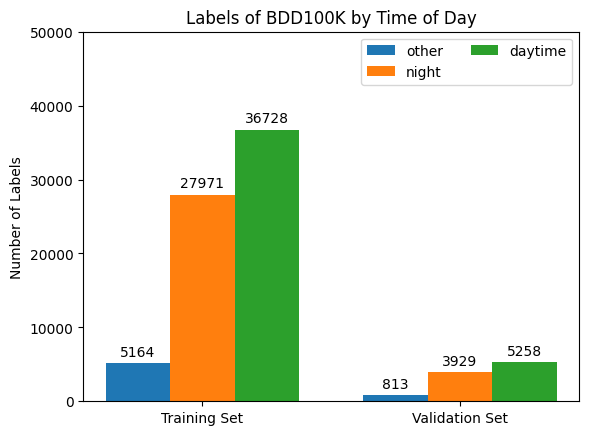

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ('Training Set','Validation Set')
daytime_distribution = {
    "other": (other_train_labels, other_val_labels),
    "night": (num_night_train_labels, num_night_val_labels),
    "daytime": (num_day_train_labels, num_day_val_labels),
}

# Bar width and positions
bar_width = 0.25
x = np.arange(len(categories))
multiplier = 0

# Create stacked bar chart
fig, ax = plt.subplots()
for time, number in daytime_distribution.items():
    offset = bar_width * multiplier
    rects = ax.bar(x + offset, number, bar_width, label=time)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Labels and title
ax.set_ylabel('Number of Labels')
ax.set_title('Labels of BDD100K by Time of Day')
ax.set_xticks(x + bar_width, categories)
ax.legend(loc="upper right", ncols=2)
ax.set_ylim(0, 50000)


# Show plot

plt.show()

In [14]:
import os

# filter out all the night labels
num_night_val_labels = [i['name'] for i in val_labels if i['attributes']['timeofday'] == "night"]
print(num_night_val_labels[:2])
num_night_train_labels = [i['name'] for i in train_labels if i['attributes']['timeofday'] == "night"]
print(num_night_train_labels[:2])

# list of all image names in the training set folder
train_images = os.listdir(train_images_path)
print(train_images[:2]) # list of all image names in the training set folder
print(len(train_images))

# list of all image names in the validation set folder
val_images = os.listdir(val_images_path)
print(val_images[:2]) # list of all image names in the validation
print(len(val_images))

['b1c81faa-3df17267.jpg', 'b1c81faa-c80764c5.jpg']
['0001542f-5ce3cf52.jpg', '0001542f-7c670be8.jpg']
['61c0de9c-996cae66.jpg', '6dd63871-831611a6.jpg']
69864
['ca35c192-7f0eadba.jpg', 'c08b49d7-164707bb.jpg']
10000


In [ ]:
# find all the images that do not have night labels
remove_list = []

for image in train_images:
    if image not in num_night_train_labels and image != ".DS_Store":
        remove_list.append(f"{train_images_path}/{image}")

for image in val_images:
    if image not in num_night_val_labels and image != ".DS_Store":
        remove_list.append(f"{val_images_path}/{image}")

print(len(remove_list))

47963


In [17]:
# remove the images
for image in remove_list:
    os.remove(image)

In [19]:
# print number of images in the training set
train_images = os.listdir(train_images_path)
print(len(train_images) -1) # -1 for the .DS_Store file

# print number of images in the validation set
val_images = os.listdir(val_images_path)
print(len(val_images))

27971
3929


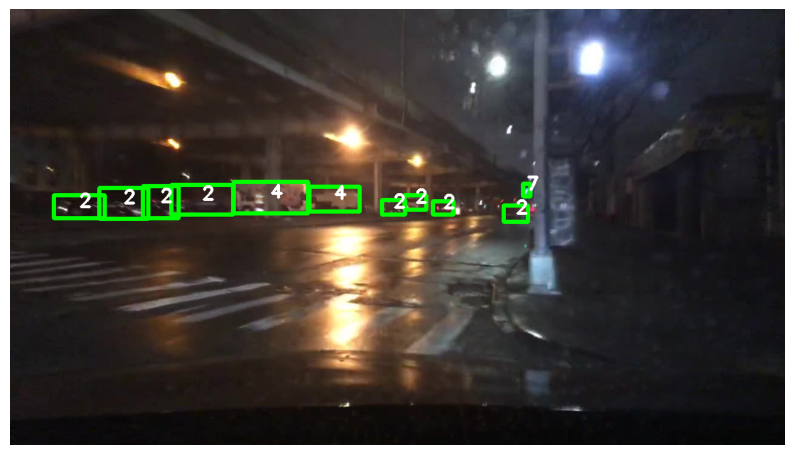

In [39]:
import cv2
import random
import glob

dataset_path = "../../yolo-testing/datasets/bdd100k_night"

id2cls = {
    0: "person",
    1: "rider",
    2: "car",
    3: "bus",
    4: "truck",
    5: "bike",
    6: "motor",
    7: "tl_green",
    8: "tl_red",
    9: "tl_yellow",
    10: "tl_none",
    11: "traffic_sign",
    12: "train",
}

def draw_yolo_bboxes(image_path, label_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    with open(label_path, 'rt') as f:
        data_lines = f.readlines()
    
    bboxes = []
    w, h = 1280, 720

    for item in range(len(data_lines)):
        cl=int(data_lines[item].split(" ")[0])
        a=float(data_lines[item].split(" ")[1])
        b=float(data_lines[item].split(" ")[2])
        c=float(data_lines[item].split(" ")[3])
        d=float(data_lines[item].split(" ")[4][:-1])
        
        x1 = int((a-c/2)*w)
        y1 = int((b-d/2)*h)
        x2 = int((a+c/2)*w)
        y2 = int((b+d/2)*h)
        
        bboxes.append([x1,y1,x2,y2,cl])

    for c in bboxes:
        cv2.rectangle(img, (c[0],c[1]), (c[2], c[3]), (0, 255, 0), 5)
        cv2.putText(img, str(c[4]), (int((c[0]+c[2])/2), int((c[1]+c[3])/2)), 0, 1, (255, 255, 255),3)
        
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()

# Example usage
img_path = random.sample(glob.glob(f"{dataset_path}/images/train/*.jpg"), 1)[0]
image_name = os.path.basename(img_path)[:-4]
label_path = f"{dataset_path}/labels/train/{image_name}.txt"

draw_yolo_bboxes(img_path, label_path)